# Data recording sheet

| Testing information | |
|---|---|
| Experiment | Rock vs No Rock |
| Description | Test effect of bicycle lean on maximal power output |
| Date | September 9, 2020 |
| Location | Locomotion Laboratory  |
| Subject | LG |
| Calibration factor | 327 |

---
## Protocol

- Charge Garmin, iPad, and IMUs
- Consent form
- Attach IMUs (frame=2050 , crank=2431)
- Set saddle height and handlebar position
- Sanitize bicycle
- Calibrate power meter
- Warm up
- Familiarization trials
- Pmax Test
- Begin experimental trials
  - Sync IMUs with Garmin at start and end of each trial 
- Gift card & signature

| Conditions ||
|---|---|
| 1 | Ad libitum |
| 2 | Self-restricted |
| 3 | Locked |

| Trial order ||
|---|---|
| Warm Up | 5 min at 100 W (3.5 lb) |
| Famil. | Standing and leaning (8.5 lb) |
| Pmax Test | 1, 1, 1 |
| Block 1 | 1, 2, 3 |
| Block 2 | 3, 1, 2 |
| Block 3 | 2, 3, 1 |

---
## Results

| Environmental conditions | |
|---|---|
| Temp. (C) | 22.0 |
| Humidity (%) | 28.4 |
| Pressure (mmHg) | 636 |
| Altitude (m) | 1641 |

| Subject characteristics ||
|---|---|
| Sex | M |
| Age (yrs) | 41 |
| Mass (lb/kg) | 140 / 63.5 |
| Height (ft/m) | 5'10" / 1.78 |



In [ ]:
import numpy as np

mass = 140
listPerc = [0.06, 0.12, 0.15]
listRes = np.array(listPerc)*mass
listRes

array([ 8.4, 16.8, 21. ])

### Pmax Test

| Condition | Trial | Hanging Weight (Lbs) | Power  (W) | Cadence (RPM) | 
| --- | --- | --- | --- | --- |
| 1 | 1 | 6% b.w. = 8.5 | 712 | 149 |
| 1 | 2 | 12% b.w. = 17 | 860 | 104 |
| 1 | 3 | 15% b.w. = 21 | 856 | 80 |

Predicted maximal power output is 864.0235294117642
Predicted optimal hanging weight is 18.5


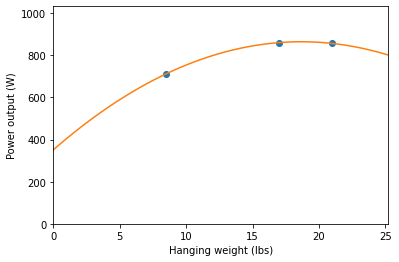

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set data
x = [8.5, 17, 21]
y = [712, 860, 856]

# calculate polynomial 
c = np.polyfit(x,y,2)
poly = np.poly1d(c)

# calculate new x and y values
new_x = np.linspace(0, 50, 101)
new_y = poly(new_x)

# plot the polynomial
plt.plot(x, y, "o", new_x, new_y)
plt.xlim([0, max(x)*1.2])
plt.ylim([0, max(y)*1.2])
plt.xlabel('Hanging weight (lbs)')
plt.ylabel('Power output (W)')

ind = np.argmax(new_y)
xOpt = new_x[ind]
yOpt = max(new_y)

print("Predicted maximal power output is", yOpt)
print("Predicted optimal hanging weight is", xOpt)


### Experimental trials

| Condition | Trial | Power (W) | Cadence (RPM) |
|---|---|---|---|
| 1 | 1 | 876 | 108 |
| 2 | 1 | 855 | 101 |
| 3 | 1 | 848 | 104 |
| 3 | 2 | 775 | 99 |
| 1 | 2 | 862 | 106 |
| 2 | 2 | 840 | 103 |
| 2 | 3 | 792 | 101 |
| 3 | 3 | 835 | 104 |
| 1 | 3 | 857 | 102 |

---
## Data Analysis (Python)


In [ ]:
# create data table
import pandas as pd
import numpy as np

data = pd.DataFrame(np.array([
                              [7, 1, 1, 18.5, 876, 108], 
                              [7, 2, 1, 18.5, 855, 101], 
                              [7, 3, 1, 18.5, 848, 104],
                              [7, 3, 2, 18.5, 775, 99],
                              [7, 1, 2, 18.5, 862, 106],
                              [7, 2, 2, 18.5, 840, 103],
                              [7, 2, 3, 18.5, 792, 101],
                              [7, 3, 3, 18.5, 835, 104],
                              [7, 1, 3, 18.5, 857, 102]
                              ]),
                    columns=['subject','condition','trial','hanging weight','power','cadence'])
data

,condition,trial,power,cadence
0,1,1,876,108
1,2,1,855,101
2,3,1,848,104
3,3,2,775,99
4,1,2,862,106
5,2,2,840,103
6,2,3,792,101
7,3,3,835,104
8,1,3,857,102


In [ ]:
data.groupby('condition')[['power','cadence']].mean()

,power,cadence
condition,,
1,865.000000,105.333333
2,829.000000,101.666667
3,819.333333,102.333333


In [ ]:
data.groupby('condition')[['power','cadence']].std()

,power,cadence
condition,,
1,9.848858,3.055050
2,32.908965,1.154701
3,38.940125,2.886751
